In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Spotify_data.csv')
df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

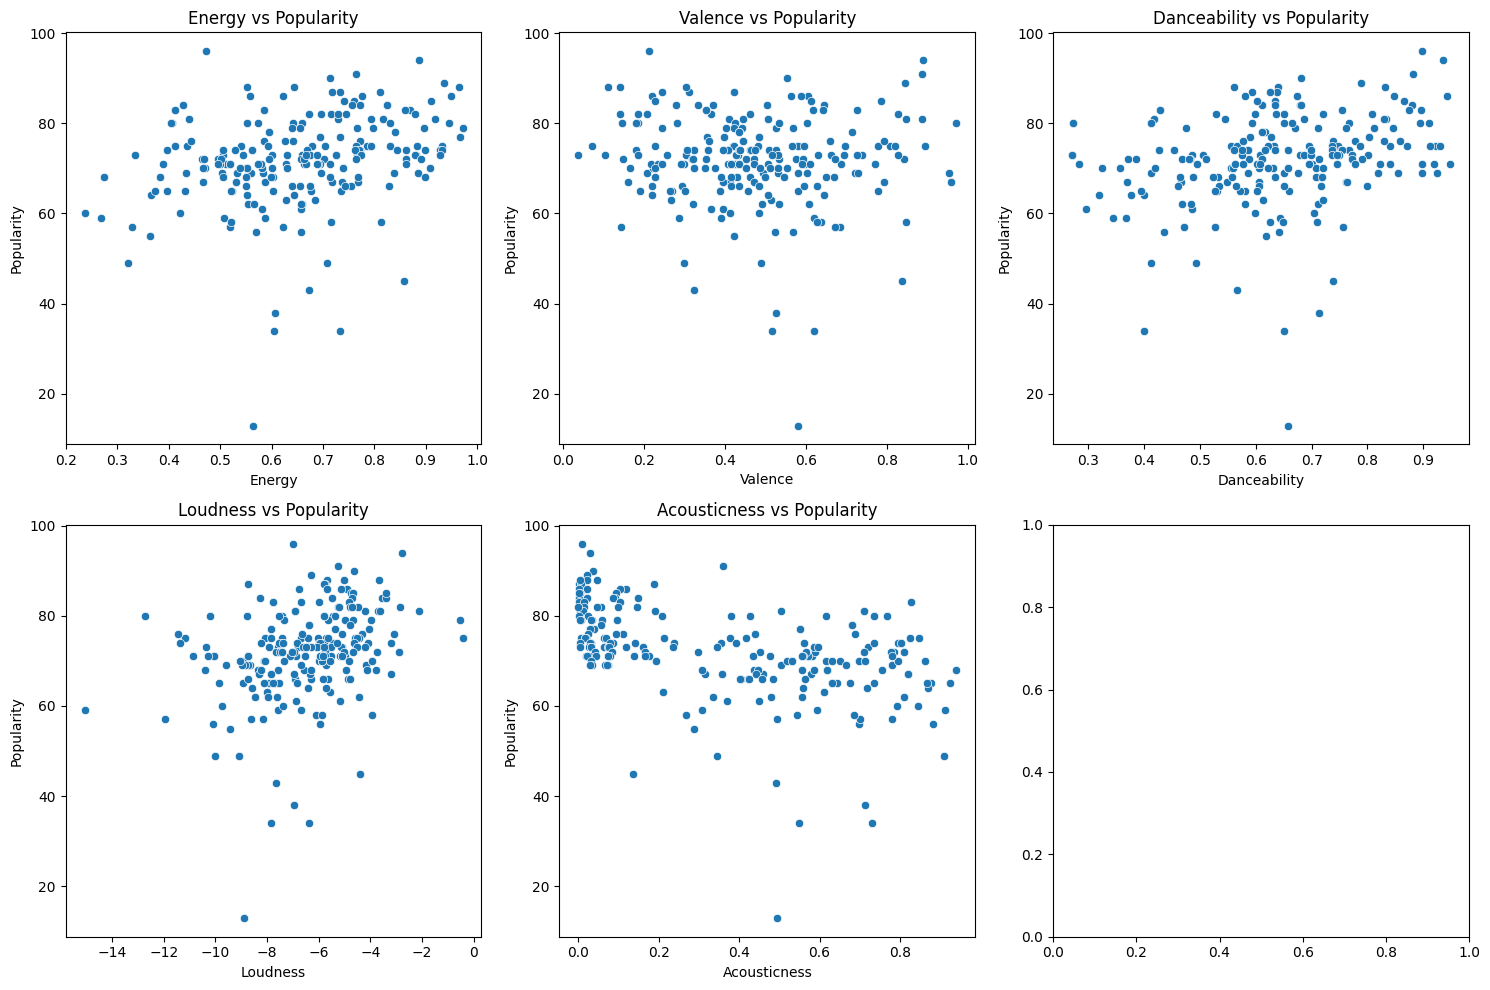

In [8]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y= 'Popularity', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs Popularity')
plt.tight_layout()
plt.show()

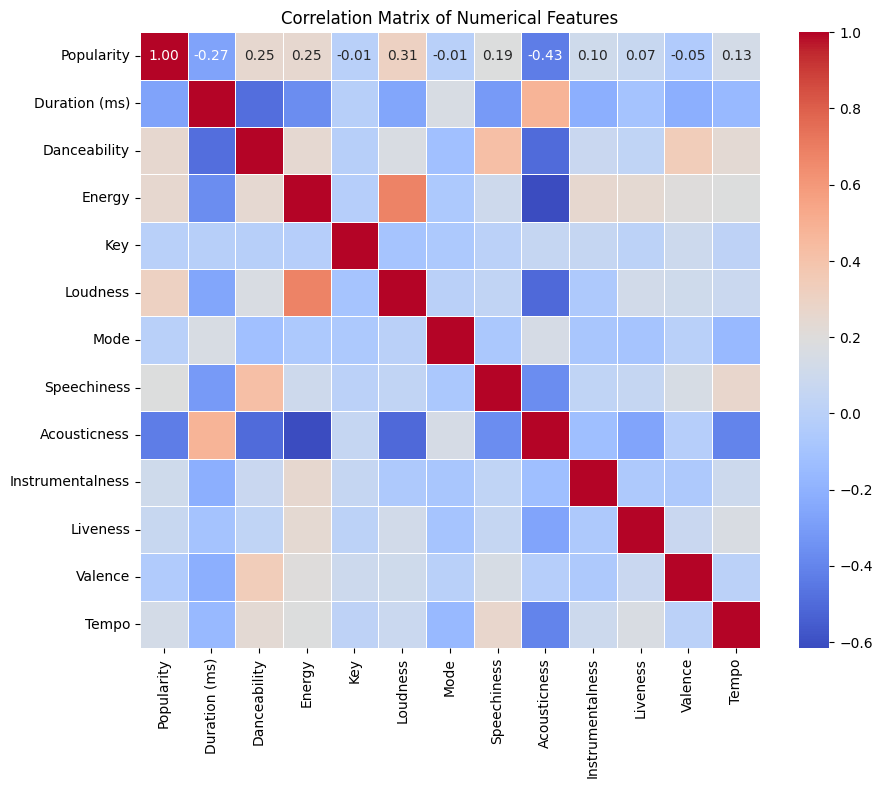

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [7]:
print(correlation_matrix)

                  Popularity  Duration (ms)  Danceability    Energy       Key  \
Popularity          1.000000      -0.269510      0.251928  0.250068 -0.008550   
Duration (ms)      -0.269510       1.000000     -0.484826 -0.365698 -0.012312   
Danceability        0.251928      -0.484826      1.000000  0.242587 -0.013330   
Energy              0.250068      -0.365698      0.242587  1.000000 -0.017352   
Key                -0.008550      -0.012312     -0.013330 -0.017352  1.000000   
Loudness            0.308110      -0.256522      0.166232  0.678558 -0.093016   
Mode               -0.008246       0.158170     -0.118235 -0.063101 -0.061717   
Speechiness         0.190621      -0.312642      0.419217  0.103059  0.004854   
Acousticness       -0.431117       0.476488     -0.498951 -0.616124  0.055651   
Instrumentalness    0.104846      -0.212550      0.077016  0.250163  0.054473   
Liveness            0.066110      -0.104685      0.030781  0.239486  0.013291   
Valence            -0.045580

c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

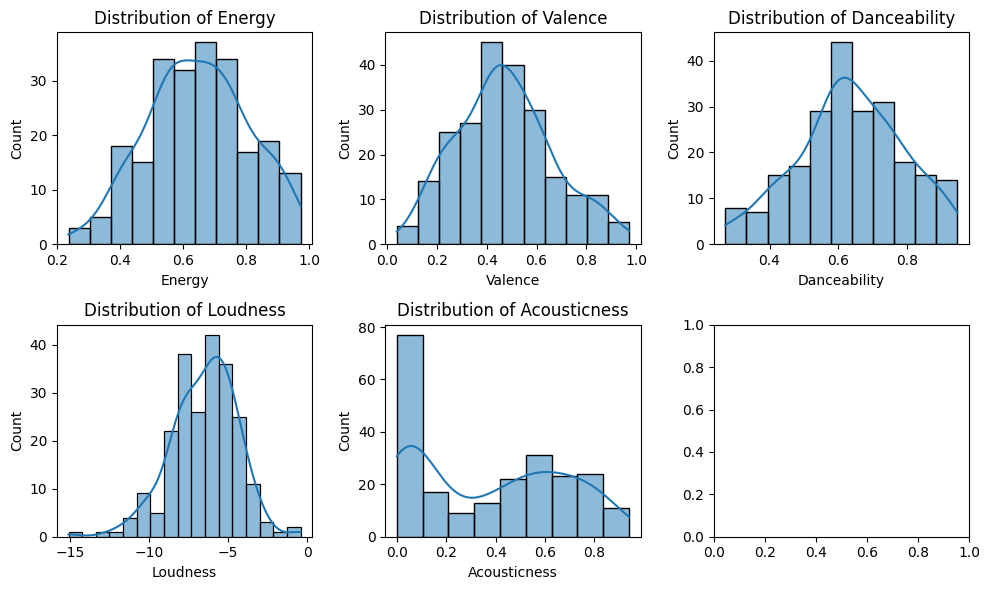

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']

X = df[features]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
param_grid  = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [17]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=2025, n_jobs=-1),
                             param_grid, 
                             cv=5,
                             verbose=1,
                             n_jobs=-1,
                             refit=True,
                             scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test_scaled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


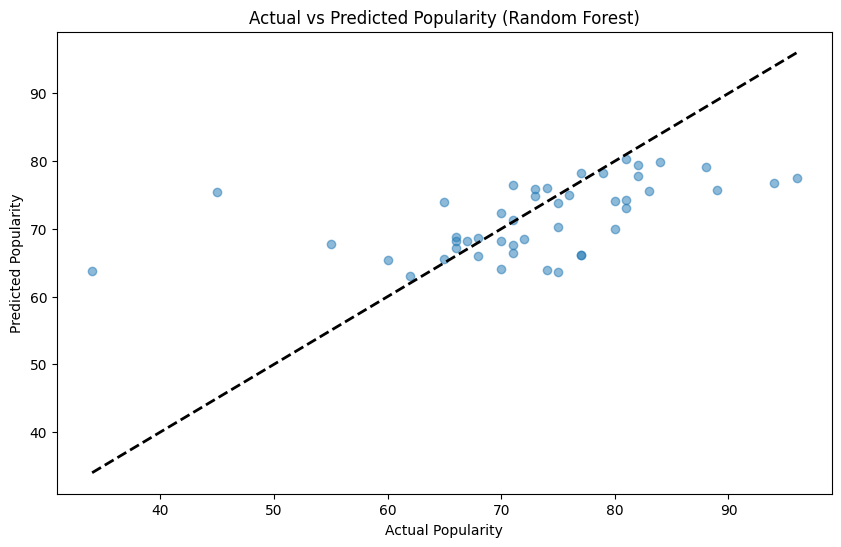

In [18]:
y_pred_rf = best_model_rf.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Random Forest)')
plt.show()